# -------------------------------------MINI PROJECT NO. 2---------------------------------------

## --------------------------Modeling using basic Supervised Learning Method--------------------------

# IMPORTING LIBRERIES

In [141]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.max_colwidth',-1)
pd.options.display.max_columns=50

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
import seaborn as sns
sns.set(style='whitegrid',font_scale=1.3,color_codes=True)

In [143]:
pip install plotly 


Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install chart--studio

Note: you may need to restart the kernel to use updated packages.


In [146]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# LOADING AND ANALYZING THE DATA

In [147]:
data=pd.read_csv('insurance.csv')
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
data.isnull().sum()  #CHECKING FOR NULL VALUE IF ANY

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [149]:
data.info() #GETTING INFO OF THE DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [150]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [151]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [152]:
insuranceData=data  #RENAMING THE DATA 

# PANDAS PROFILING BEFORE PREPROCESSING

In [153]:
import pandas
!pip install pandas-profiling

In [154]:
import pandas_profiling
'''
profile = insuranceData.profile_report(title = 'pandas profiling report before data preprccessing ')
profile.to_file (output_file = "insuranceData_profile_before_preproccessing.html")

'''

'\nprofile = insuranceData.profile_report(title = \'pandas profiling report before data preprccessing \')\nprofile.to_file (output_file = "insuranceData_profile_before_preproccessing.html")\n\n'

In [155]:
profile=profile=pandas_profiling.ProfileReport(insuranceData)

In [156]:
profile.to_file(output_file = "insuracnceData_prifiling_before_perprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA PREPROCESSING

In [157]:
insuranceData.describe()

,df_index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [158]:
insuranceData.head()

,df_index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [159]:
insuranceData['df_index']='rank'

In [160]:
insuranceData.head()

,df_index,age,sex,bmi,children,smoker,region,charges
0,rank,19,female,27.900,0,yes,southwest,16884.92400
1,rank,18,male,33.770,1,no,southeast,1725.55230
2,rank,28,male,33.000,3,no,southeast,4449.46200
3,rank,33,male,22.705,0,no,northwest,21984.47061
4,rank,32,male,28.880,0,no,northwest,3866.85520


In [161]:
insuranceData.drop(['df_index'],axis = 1,inplace = True)

In [162]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [163]:
insuranceData ['smoker']=insuranceData['smoker'].replace('yes',1)
insuranceData ['smoker']=insuranceData['smoker'].replace('no',0)

In [164]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [165]:
insuranceData ['region']=insuranceData['region'].replace('southwest',1)
insuranceData ['region']=insuranceData['region'].replace('southeast',2)
insuranceData ['region']=insuranceData['region'].replace('northwest',3)
insuranceData ['region']=insuranceData['region'].replace('northeast',4)

In [166]:
insuranceData.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,3,21984.47061
4,32,male,28.880,0,0,3,3866.85520


# PANDAS PROFILING AFTER DATA PREPROCESSING

In [167]:
profile = pandas_profiling.ProfileReport(insuranceData)

In [168]:
profile.to_file(output_file="insuranceData_profile_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [169]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,3,21984.47061
4,32,male,28.880,0,0,3,3866.85520


# Data Visualization

<AxesSubplot:>

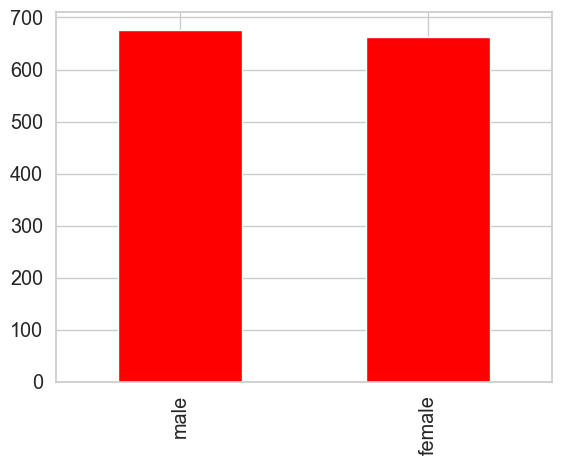

In [170]:
insuranceData['sex'].value_counts().plot(kind='bar',color='red') #GETTING THE DISTRIBUTION OF MENS AND WOMENS IN THE DATA


Text(0.5, 1.0, 'Pair Plot')

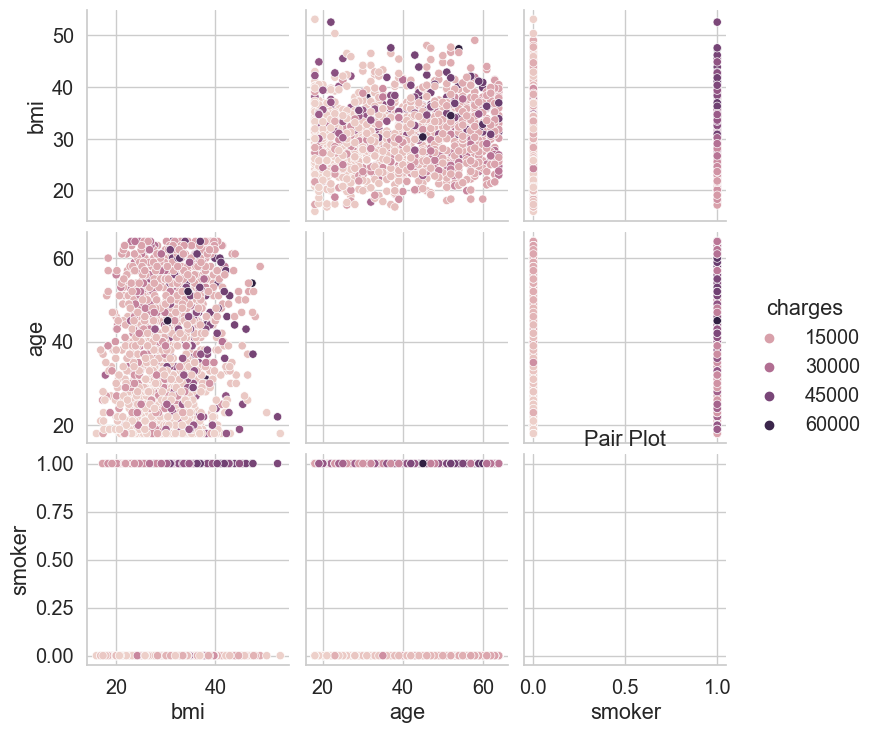

In [171]:
import seaborn as sns
sns.pairplot(insuranceData[['charges','age','bmi','smoker']], vars=['bmi','age','smoker'], hue='charges',dropna=True)
plt.title('Pair Plot')    #TRYING TO GET INSIGHTS OR FINDING CORELATION USING PAIRPLOT 

Text(0.5, 1.0, 'Correlation between features')

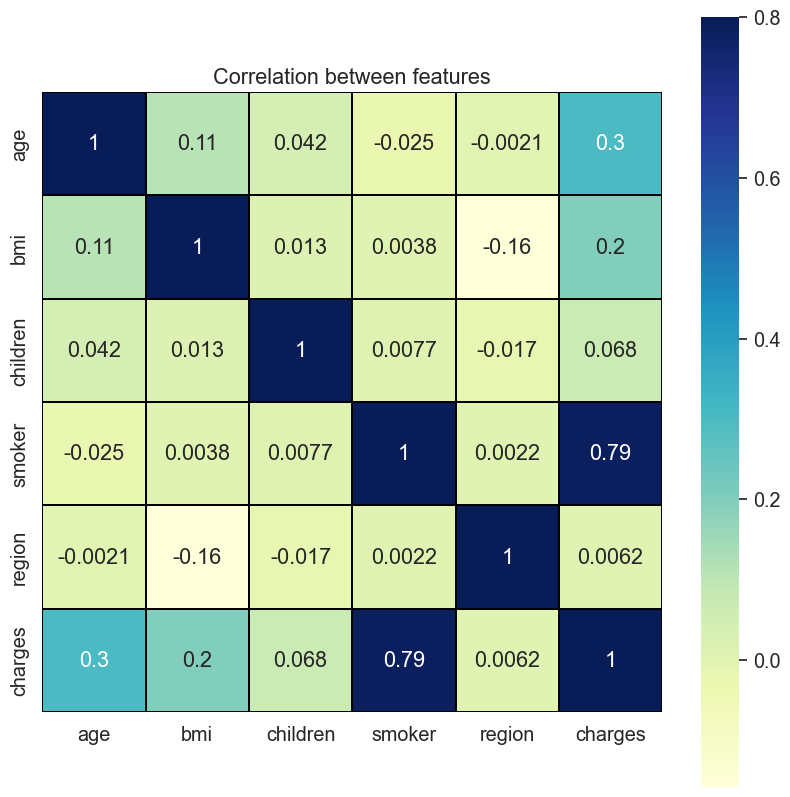

In [172]:
corr=insuranceData.corr()     #BEST WAY TO FIND CORELATION BETWEEN ALL THE FEATURES
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidth= 0.01, square= True, annot= True, cmap='YlGnBu',linecolor='black')
plt.title('Correlation between features')   

<AxesSubplot:xlabel='sex'>

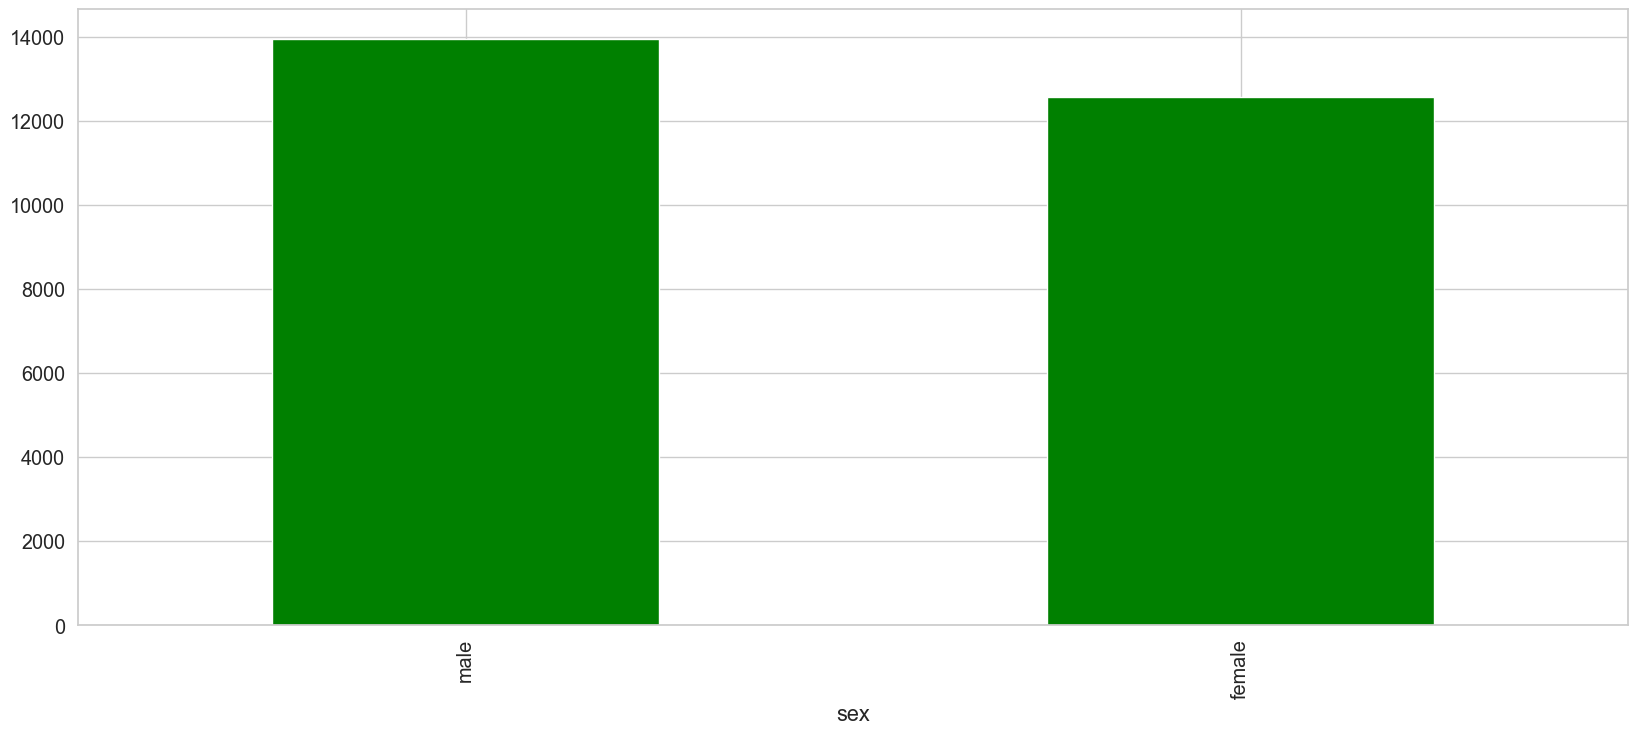

In [173]:
plt.figure(figsize=(20,8))
insuranceData.groupby('sex')['charges'].mean().sort_values(ascending=False).plot(kind='bar',color='green')
# Gtting the charges difference between both male and female

In [174]:
insuranceData02=insuranceData.copy()   # creating a copy of the data for backup
insuranceData02.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,3,21984.47061
4,32,male,28.880,0,0,3,3866.85520


In [175]:
insuranceData.columns=['age','sex','bmi','children','smoker','region','charges']  # setting columns
insuranceData.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,3,21984.47061
4,32,male,28.880,0,0,3,3866.85520


In [176]:
insuranceData['sex']=insuranceData['sex'].replace('male',1)
insuranceData['sex']=insuranceData['sex'].replace('female',0) #setting male and female as 0 and 1 for fitting in models

In [177]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# MAKING DATA READY FOR MODEL EVALUATION

In [178]:
feature_col=['age','sex','smoker','children']

In [179]:
x=insuranceData[feature_col]

In [180]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(1338, 4)


In [181]:
y=np.array(insuranceData.charges)

In [182]:
print(type(x))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(1338,)


In [183]:
from sklearn.model_selection import train_test_split


In [184]:
def split (x,y):
    return train_test_split (x,y,test_size=0.20,random_state=1)

In [185]:
x_train,x_test,y_train,y_test=split(x,y)
print('train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\n test cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

train cases as below
x_train shape:  (1070, 4)
y_train shape:  (1070,)

 test cases as below
x_test shape:  (268, 4)
y_test shape:  (268,)


In [186]:
from sklearn import preprocessing 
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

#view transformed values
print(y_train)


[ 592  576    4 ... 1039  840  656]


# USING KNN MODEL FOR PREDICTION

In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6,p=2,metric='minkowski')

In [188]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [189]:
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

# Model evaluation for KNN model using MAE,MSE,RMSE


In [190]:
import sklearn.metrics as metrics
knn_MAE_train=metrics.mean_absolute_error(y_train,y_pred_train)
knn_MAE_test =metrics.mean_absolute_error(y_test,y_pred_test)
print ('MEA for training data is {}'.format(knn_MAE_train))
print ('MEA for test data is {}'.format(knn_MAE_test))

MEA for training data is 163.12429906542056
MEA for test data is 13045.530244701493


In [191]:
knn_MSE_train=metrics.mean_squared_error(y_train,y_pred_train)
knn_MSE_test =metrics.mean_squared_error(y_test,y_pred_test)
print('MSE for training data is {}'.format(knn_MSE_train))
print('MSE for test data is {}'.format(knn_MSE_test))

MSE for training data is 88028.94859813084
MSE for test data is 317242191.38086325


In [192]:
knn_RMSE_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
knn_RMSE_test =np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print ('RMSE for train data is {}'.format(knn_RMSE_train))
print ('RMSE for test data is {}'.format(knn_RMSE_test))

RMSE for train data is 296.69672832394167
RMSE for test data is 17811.29392775447


# USING LOGISTIC REGRESSION FOR PREDICTION

In [193]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [194]:
LR.fit(x_train,y_train)

LogisticRegression()

In [195]:
y_pred_test = LR.predict(x_test)

In [196]:
y_pred = LR.predict(x)

In [197]:
insuranceData['y_pred']=y_pred

In [198]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges,y_pred
0,19,0,27.900,0,1,1,16884.92400,816
1,18,1,33.770,1,0,2,1725.55230,179
2,28,1,33.000,3,0,2,4449.46200,353
3,33,1,22.705,0,0,3,21984.47061,695
4,32,1,28.880,0,0,3,3866.85520,200


In [199]:
y_pred_train = LR.predict(x_train).round()
y_pred_train

array([939, 579, 797, ..., 945, 840, 579], dtype=int64)

In [200]:
y_pred_test = LR.predict(x_test)
y_pred_test

array([ 797,  939,  579,  698,  179, 1009,  579,  939,  112,  983,  939,
        792,  411,  437,  797,  579,  695,  430,  579,  939,  579,  825,
        503,  579,  816,  379,  593,  615,  358,  141,  579,  306,  945,
        816, 1049,  579,  795,  296,  939,  843,  312,  939,  740,  579,
        337,  939,  179,  797,  741,  945,  939,  792,  797,  620,  816,
        253, 1047,  939,  179,  797,  170,  939,  816,  816,  939,  579,
        679,  579,  816,  816, 1045,  803,  816,  793,  939,  579,  179,
        141,  939,  579,  816,  792,  579,  797,  863,  972,  437,  901,
        579,  464,  983, 1049,  929,  579,  797,  579,  579,  792,  939,
        904,  939,  797, 1009,  816,  939,  816,  816,  579,  816,  939,
        290,  228,  797,  793,  179,  797,  395,  939,  445,  816,  741,
        593,  357,  471, 1050,  635,  793, 1019,  882,  524,  816,  179,
        414,  986,  471,  816,  797,  816,  939,  861,  939,  474,  836,
        939,  792,  579,  179,  559,  179,  408,  5

# Model evaluation for LogisticRegression using MAE,MSE,RMSE

In [201]:
import sklearn.metrics as metrics
LR_MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
LR_MAE_train


202.6411214953271

In [202]:
LR_MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)
LR_MAE_test

12761.97427455224

In [203]:
print('MAE for training data is {}'.format(LR_MAE_train))
print('MAE for test data is {}'.format(LR_MAE_test))

MAE for training data is 202.6411214953271
MAE for test data is 12761.97427455224


In [204]:
LR_MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
LR_MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
print('MSE for training data is {}'.format(LR_MSE_train))
print('MSE for test data is {}'.format(LR_MSE_test))

MSE for training data is 102599.72336448598
MSE for test data is 309658204.8403637


In [205]:
LR_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
LR_RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE for training data is {}'.format(LR_RMSE_train))
print('RMSE for test data is {}'.format(LR_RMSE_test))

RMSE for training data is 320.3119157391526
RMSE for test data is 17597.107854427773


# compairing both models

In [206]:
print('MAE of train data  based on  knn model is {}'.format(knn_MAE_train))
print('MAE of train data based on logistica regression is {}'.format(LR_MAE_train))

MAE of train data  based on  knn model is 163.12429906542056
MAE of train data based on logistica regression is 202.6411214953271


### Based on the results, we can see that the KNN model had a lower MAE of 163.12 on the training data compared to the Logistic Regression model, which had a higher MAE of 202.64. This suggests that, on average, the KNN model's predictions were closer to the actual values in the training dataset than the Logistic Regression model's predictions.

In [207]:
print('MAE of test data based on knn model is {}'.format(knn_MAE_test))
print('MAE of test data based on logistica regression is {}'.format(LR_MAE_test))

MAE of test data based on knn model is 13045.530244701493
MAE of test data based on logistica regression is 12761.97427455224


### Moving on to the test dataset, we can see that the KNN model has a higher MAE of 13045.53 compared to the Logistic Regression model, which has a slightly lower MAE of 12761.97. This implies that, on average, the Logistic Regression model performed better than the KNN model on the test data.

# NOTE:However, it's worth noting that the MAE values are only one aspect of evaluating the performance of the models. Other metrics, such as precision, recall, accuracy, or F1 score, should also be considered to have a comprehensive understanding of the models' performance. Additionally, it would be beneficial to compare the models' results with other models to determine the best performing model on this dataset.